In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
loaded_metrics = np.load('/media/local-admin/lightmycells/thesis/code/gan_DIC_stack/eval/all_validation_metrics_DIC_stack.npy', allow_pickle=True).item()
output_path = '/media/local-admin/lightmycells/thesis/code/gan_DIC_stack/training_gan_DIC_stack.png'
# Access the dictionary
print(loaded_metrics)

{0: {'MAE': 0.1028381007265547, 'SSIM': 0.6378817986585791, 'PCC': 0.5111205042086678, 'ECD': 170.2761916376737, 'COS': 0.2894632511953341}, 2: {'MAE': 0.0993039326519238, 'SSIM': 0.6397405404727367, 'PCC': 0.5000844416258452, 'ECD': 167.34499248355533, 'COS': 0.29650432174062913}, 4: {'MAE': 0.10195409198047274, 'SSIM': 0.6418347790512423, 'PCC': 0.5080471249644652, 'ECD': 170.2130310376971, 'COS': 0.29311948319183556}, 6: {'MAE': 0.10680511917318966, 'SSIM': 0.6256243479308299, 'PCC': 0.5154135111159845, 'ECD': 174.77292006599473, 'COS': 0.28772970322983693}, 8: {'MAE': 0.10173121877250076, 'SSIM': 0.6349268356840251, 'PCC': 0.5128997952505464, 'ECD': 168.85320848428753, 'COS': 0.28774748719632454}, 10: {'MAE': 0.10382433633980587, 'SSIM': 0.6304591518327919, 'PCC': 0.5154532816381108, 'ECD': 170.7347332277114, 'COS': 0.2851415296647575}, 12: {'MAE': 0.10879192962337793, 'SSIM': 0.6184860792780873, 'PCC': 0.5057048669232361, 'ECD': 176.86316412095826, 'COS': 0.29170592130500517}, 14:

In [7]:
# Initialize variables to track the best epoch and the lowest sum of metrics
best_epoch = None
lowest_sum = float('inf')

# Iterate over the epochs and calculate the sum of metrics for each epoch
for epoch, metrics in loaded_metrics.items():
    # Negate the PCC and SSIM values
    metric_sum = sum([
        metrics['MAE'],
        -metrics['SSIM'],
        -metrics['PCC'],
        metrics['ECD'],
        metrics['COS']
    ])
    if metric_sum < lowest_sum:
        lowest_sum = metric_sum
        best_epoch = epoch

print(f'The best epoch is {best_epoch} with a total metric sum of {lowest_sum}')

The best epoch is 390 with a total metric sum of 165.3078944308909


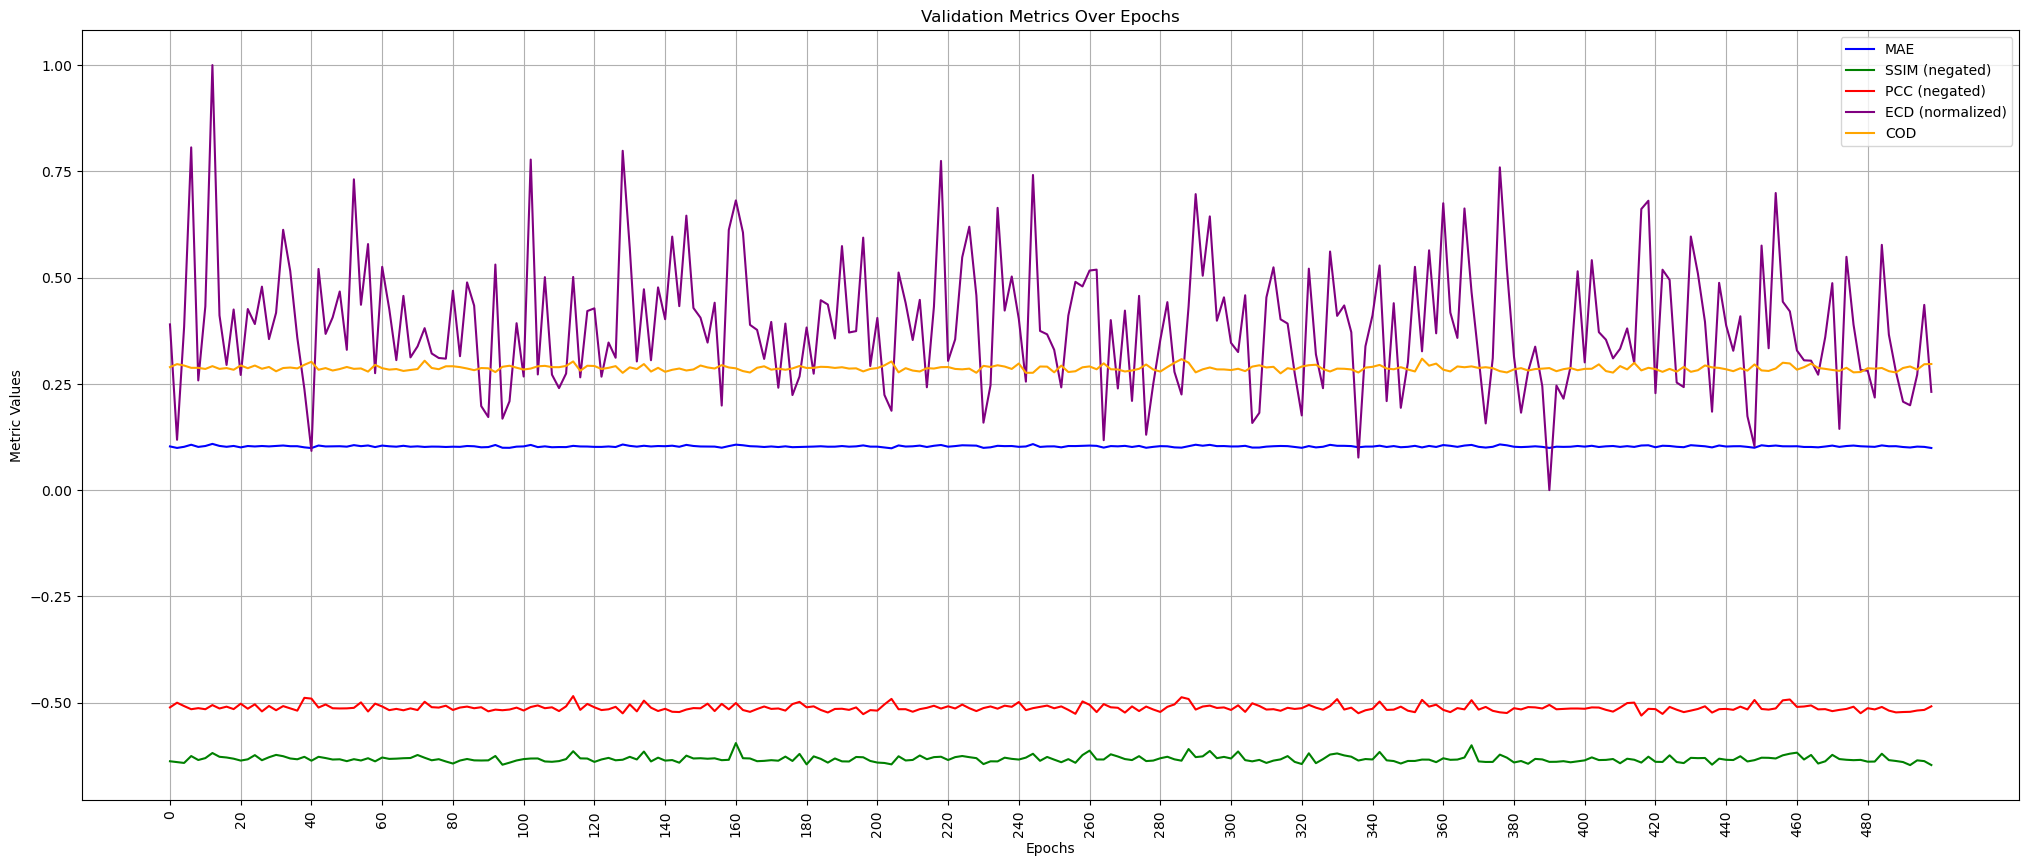

In [8]:
# Assuming you have metrics recorded for multiple epochs
epochs_metrics = loaded_metrics

# Extract epochs
epochs = list(epochs_metrics.keys())

# Initialize lists to store metrics values for each metric
mae_values = []
ssim_values = []
pcc_values = []
ecd_values = []
cos_values = []

# Populate the lists with values from each epoch
for epoch in epochs:
    mae_values.append(epochs_metrics[epoch]['MAE'])
    ssim_values.append(-epochs_metrics[epoch]['SSIM'])  # Negate SSIM
    pcc_values.append(-epochs_metrics[epoch]['PCC'])    # Negate PCC
    ecd_values.append(epochs_metrics[epoch]['ECD'])
    cos_values.append(epochs_metrics[epoch]['COS'])

# Normalize ECD values between 0 and 1
ecd_min = min(ecd_values)
ecd_max = max(ecd_values)
ecd_values = [(ecd - ecd_min) / (ecd_max - ecd_min) for ecd in ecd_values]

# Plotting the metrics
plt.figure(figsize=(25, 10))

plt.plot(epochs, mae_values, label='MAE', color='blue')
plt.plot(epochs, ssim_values, label='SSIM (negated)', color='green')
plt.plot(epochs, pcc_values, label='PCC (negated)', color='red')
plt.plot(epochs, ecd_values, label='ECD (normalized)', color='purple')
plt.plot(epochs, cos_values, label='COD', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Metric Values')
plt.title('Validation Metrics Over Epochs')
plt.legend()
plt.grid(True)
# Set x-axis ticks to show all epoch numbers
step = 10
plt.xticks(ticks=epochs[::step], labels=epochs[::step], rotation=90)

plt.savefig(output_path, bbox_inches='tight')

plt.show()
